In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Đọc data set Adult trên uci
# Dự đoán thu nhập có vượt quá $50k/năm hay không?, dựa trên dữ liệu điều tra dân số  
dataset_adult = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
dataset_adult.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

In [ ]:
dataset_adult.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Hiện thị thông tin ngắn ngọn 
dataset_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Xóa khoảng trống đằng trước của từng giá trị
df_obj = dataset_adult.select_dtypes(['object'])
dataset_adult[df_obj.columns] = df_obj.apply(lambda x:x.str.strip())

In [ ]:
# in tổng số các giá trị nan của từng cột
dataset_adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# Trả về số lượng các giá trị của từng cột
for col in dataset_adult.columns:
    print ("---- %s ---" % col)
    print (dataset_adult[col].value_counts())

---- age ---
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
---- workclass ---
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
---- fnlwgt ---
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: fnlwgt, Length: 21647, dtype: int64
---- education ---
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschoo

In [ ]:
# in tổng giá trị ? 
dataset_adult.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [ ]:
# thay thế giá trị ? = nan
dataset_adult['workclass'] = dataset_adult['workclass'].replace('?',np.nan)
dataset_adult['occupation'] = dataset_adult['occupation'].replace('?',np.nan)
dataset_adult['native-country'] = dataset_adult['native-country'].replace('?',np.nan)

In [ ]:
dataset_adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [ ]:
#Xóa các giá trị nan
dataset_adult.dropna(inplace=True)

In [ ]:
print(dataset_adult.shape)
# Xóa các giá trị trùng lặp theo hàng 
dataset_adult = dataset_adult.drop_duplicates(keep='first')

(30161, 15)


In [ ]:
# Tính count và percen income
income = dataset_adult.values[:,-1]
count = Counter(income)
print('Total:',len(income))
for k,v in count.items():
    per = v / len(income) * 100
    print('Class: %s, Count=%d, Percentage=%.2f%%' % (k, v, per))

Total: 30138
Class: <=50K, Count=22632, Percentage=75.09%
Class: >50K, Count=7506, Percentage=24.91%


Text(0.5, 1.0, 'marital-status')

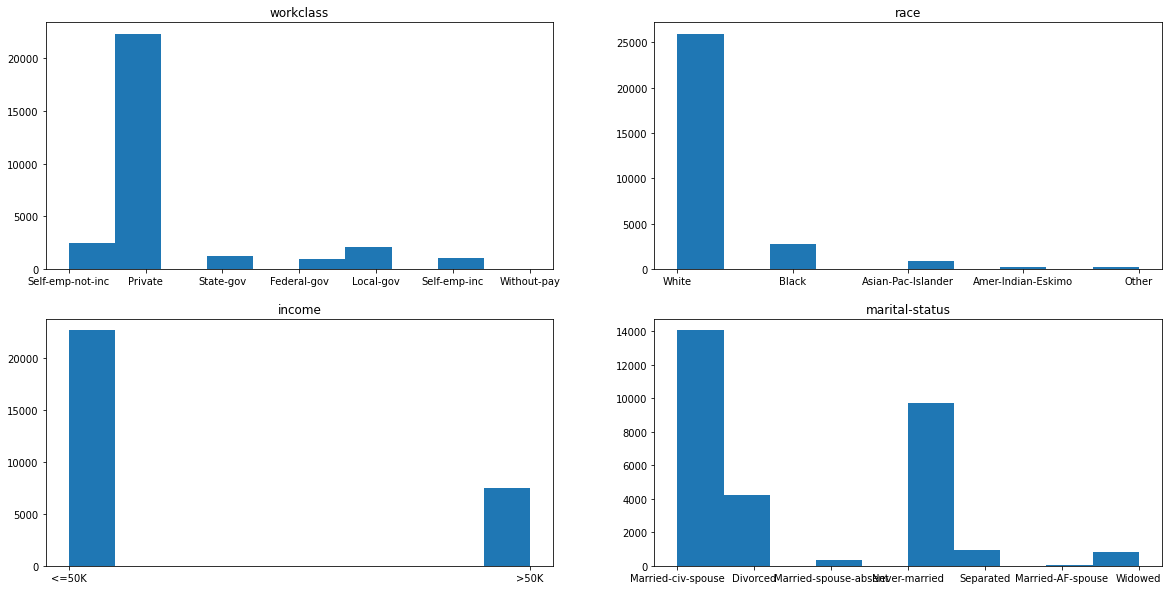

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

axes[0][0].hist(dataset_adult["workclass"])
axes[0][0].set_title("workclass")

axes[0][1].hist(dataset_adult["race"])
axes[0][1].set_title("race")


axes[1][0].hist(dataset_adult["income"])
axes[1][0].set_title("income")

axes[1][1].hist(dataset_adult["marital-status"])
axes[1][1].set_title("marital-status")

In [ ]:
to_replace = list(dataset_adult['marital-status'].unique())
to_replace.remove('Never-married')
dataset_adult.replace('Never-married','Single',inplace=True)
dataset_adult.replace(to_replace,'Married',inplace=True)
dataset_adult['marital-status'].value_counts(normalize=True)*100

Married    67.781538
Single     32.218462
Name: marital-status, dtype: float64

In [ ]:
labelEncoder = LabelEncoder()
category_col =['race','marital-status', 'sex', 'income'] 

for col in category_col:
    dataset_adult[col] = labelEncoder.fit_transform(dataset_adult[col])

category_col_1 =['workclass', 'education', 'occupation',
               'relationship','native-country'] 
df_2 = pd.get_dummies(dataset_adult, columns=category_col_1, drop_first=True)

In [ ]:
dataframe=df_2.drop('fnlwgt',1)
dataframe =dataframe[[c for c in dataframe if c not in ['income']] + ['income']]
dataframe.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,age,education-num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,50,13,0,4,1,0,0,13,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,0,4,1,0,0,40,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53,7,0,2,1,0,0,40,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28,13,0,2,0,0,0,40,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,14,0,4,0,0,0,40,0,1,...,0,0,0,0,0,0,1,0,0,0
5,49,5,0,2,0,0,0,16,0,1,...,0,0,0,0,0,0,0,0,0,0
6,52,9,0,4,1,0,0,45,0,0,...,0,0,0,0,0,0,1,0,0,1
7,31,14,1,4,0,14084,0,50,0,1,...,0,0,0,0,0,0,1,0,0,1
8,42,13,0,4,1,5178,0,40,0,1,...,0,0,0,0,0,0,1,0,0,1
9,37,10,0,2,1,0,0,80,0,1,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X = dataframe.iloc[:, 0:-1].values
y = dataframe.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# sử dụng model Logistic
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(max_iter = 1000)
regression.fit(X_train, y_train ) # learning
print("Train Accuracy:",regression.score(X_train, y_train)) # tính accuracy train
print("Test Accuracy:",regression.score(X_test, y_test)) # tính accuracy test

Train Accuracy: 0.8492741600995437
Test Accuracy: 0.8437292634372926


In [ ]:
y_pred_logis=regression.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logis))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4536
           1       0.72      0.61      0.66      1492

    accuracy                           0.84      6028
   macro avg       0.80      0.76      0.78      6028
weighted avg       0.84      0.84      0.84      6028



In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear', random_state=0)  
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_svm=svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4536
           1       0.73      0.58      0.65      1492

    accuracy                           0.84      6028
   macro avg       0.80      0.76      0.77      6028
weighted avg       0.84      0.84      0.84      6028



In [ ]:
# Import libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# khởi tạo từ điển với số liệu hiệu suất
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}


# Import model classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# khởi tạo
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

In [ ]:
def models_evaluation(X, y, folds): 

    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                        'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                        'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                        'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                        'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                        index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

In [ ]:
models_evaluation(X, y, 5)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.847303,0.846904,0.812795,0.843255,0.826166,Logistic Regression
Precision,0.735260,0.747570,0.626067,0.708515,0.651793,Support Vector Classifier
Recall,0.604982,0.582203,0.616573,0.629763,0.648680,Gaussian Naive Bayes
F1 Score,0.663721,0.654467,0.621250,0.666775,0.650217,Random Forest
